# DATA ANALYTICS I


Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). 
The Boston Housing dataset contains information about various houses in Boston
through different parameters. There are 506 samples and 14 feature variables in this dataset.

In [40]:
# Import libraries and create alias for Pandas, Numpy and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Import the Boston Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [45]:
# Initialize the data frame
data = pd.DataFrame(housing.data)

In [47]:
# Add the feature names to the dataframe
data.columns = housing.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [48]:
# Adding target variable to dataframe
data['PRICE'] = housing.target

In [49]:
# Perform Data Preprocessing( Check for missing values)
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [50]:
# Split dependent variable and independent variables
x = data.drop(['PRICE'],axis = 1)
y = data['PRICE']

In [52]:
# splitting data to training and testing dataset.
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0) 

In [55]:
# Use linear regression( Train the Machine ) to Create Model
import sklearn
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
model = linear.fit(xtrain,ytrain)

In [57]:
# Predict the y_pred for all values of train_x and test_x
ytrain_pred = linear.predict(xtrain)
ytest_pred = linear.predict(xtest)

In [59]:
# Evaluate the performance of Model for train_y and test_y
df = pd.DataFrame(ytrain_pred,ytrain)
df = pd.DataFrame(ytest_pred,ytest)

In [61]:
# Calculate Mean Square Paper for train_y and test_y
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(ytest,ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

0.5289841670367221
0.5234413607125449


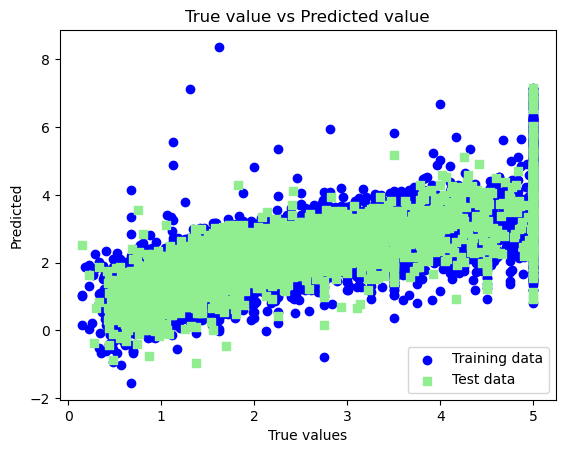

In [79]:
# Plotting the linear regression model
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc='lower right') #plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()